<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0; border-top: 2px solid #000;">
    Section 1.1: Nearest Neighbor Classifier
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px;">
    <strong>NN Classifier:</strong><br/>
    AKA Memory based reasoning, and instance based classification<br/>
    "Non parametric method": no assumptions about data are made<br/>
    <ul>Multiple variations:
        <li>k-NN method</li>
        <li>Weighted k-NN method</li>
        <li>Edited NN method</li>
        <li>Locally adaptive NN method</li>
    </ul><br/>
    <strong>Basics:</strong><br/>
    <ul>
        <li>Store your training examples with labels in db</li>
        <li>Find the best match for a given test example on training examples(nearest neighbor)</li>
        <li>Class label given to test case is that of the best matching example</li>
    </ul><br/>
    k stands for the number of nearest neighbors, the higher count of the two is what classifies your sample<br/>
    For example, k=3 means 3 closest neighbors, etc.<br/>
    KNN for sklearn link available <a href="https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn">here</a>
</div>

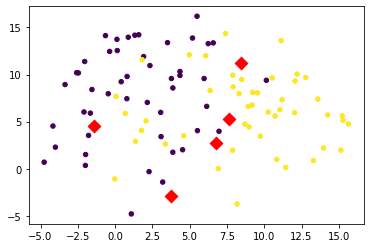

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples = 100, centers = 2, cluster_std = 4.0, random_state = 20)
from sklearn.neighbors import KNeighborsClassifier #unless specified (n_neighbors = number), k = 5
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.05, random_state=42)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s = 20)
plt.scatter(x_test[:, 0], x_test[:, 1], c='red', marker="D", s = 80)
plt.show()

In [8]:
# Look up listed color map later
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
x_min, x_max = x[:, 0].min(), x[:, 1].max()


<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px; border-bottom: 2px solid #000;">
    Feature normalization should be implemented to prevent heavily weighted data points from skewing data<br/>
    For small training sets (50-100 samples), take k = 1, for larger sets, take k as odd, and approx, 7,9,11.<br/>
    Computationally expensive for larger subsets of data and features.<br/>
    k-d tree: data structure for transversing high dimensional space <a href="https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/kdtrees.pdf">Info Here</a><br/>
</div>

<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0;">
    Section 1.2: Naive Bayes
</div>
<div style="font-size: 1.5rem; line-height: 2.5rem; padding-bottom: 30px; border-bottom: 2px solid #000;">
    <strong>Bayes Classifier</strong><br/>
    Probabilistic framework, a <a href="https://towardsdatascience.com/a-generative-approach-to-classification-17a0b5876729">generative approach</a>
</div>

${\displaystyle{
    \text{Generic Bayes, independence} \\
    P(A|B) = \frac{P(B|A) * P(A)}{P(B)}\\
    \text{with d features } x_1,\ldots,x_d \\
    \text{classified by } c_1,c_2 \\
    P(c_j|x) = \frac{P(x_1,\ldots,x_d | c_j) * P(c_j)} {P(x_1,\ldots,x_d)}, \text{ j = 1, 2}\\
}}$

<div style="padding-top: 30px">
    NB if features are independent. Rarely true, but assumption helps simplifiy, with independent features, expression above 
    changes to:
</div>

${\displaystyle{
    \text{dependence: } \\
    P(c_j|x) = \frac{P(c_j)\Pi^d_{i=1} P(x_i|x_j)} {P(x_1,\ldots,x_d)}, \text{ j = 1,2} \\
    \text{Now, with only 10 discrete attributes, we need to calculate 1024 conditional probabilities,} \\
    \text{or 10 if we use previous equation on independence assumption} \\
%     \text{Assign } x \rightarrow c_j \text{ where } P(c_j)\Pi^d_{i=1}P(x_i | c_j)
}}$

<div style="padding-top: 30px">
    <strong>Laplace Smoothing</strong><br/>
    Idea is to modify probability formula to avoid 0s, either division or total probability:<br/>
</div>

${\displaystyle{
    \text{Without Smoothing} \\
    P_r(word_i|class_j) =\frac{\text{count_of_docs}(word_i,class_j)}{\text{count_of_docs}(class_j)} \\
    \text{With Smoothing} \\
    P_r(word_i|class_j) =\frac{\text{count_of_docs}(word_i,class_j) + 1}{\text{count_of_docs}(class_j) + 2} \\
    \text{Taking Frequency Into Account, where V = size} \\
    P_r(word_i|class_j) =\frac{count(word_i,class_j) + 1}{\sum_{k=1}^Vcount(word_k, class_j) + V}
}}$

<div style="padding-top: 30px">
    <strong>Naive Bayes</strong><br/>
    <ul>Summary
        <li>Fast</li>
        <li>Linear classifier</li>
        <li>Robust to noise points</li>
        <li>Handles missing values</li>
        <li>Robust to irrelevancy</li>
    </ul>
</div>

<div style="font-weight: bold; font-size: 2rem; padding-top: 20px; margin: 20px 0;">
    Section 1.3: Fisher's Linear Discriminant Function
</div>

${\displaystyle{
    y_i = w^tx_i \text{ Define the projection using w} \\
    J(w) = \frac{|\tilde{m}_1 - \tilde{m}_2|^2}{(\tilde{s}_1^2 - \tilde{s}_2^2)} \\
    \tilde{m} = \text{ Projected means of training data points from two classes} \\
    \tilde{s} = \text{ Projected varaiance of training data points from two classes} 
}}$


<div style="font-size: 1.5rem; line-height: 2.5rem; padding: 30px; border-bottom: 2px solid #000;">
    LDA (Fisher's) uses dimensionality reduction, but also takes into account class labels (supervised)<br/>
    PCA -> Maximizes Variance, LDA -> Maximizes class separation<br/>
    <strong>FLD</strong><br/>
    <ul>Summary
        <li>FLD === LDA</li>
        <li>Defines M classes by M-1 projections</li>
        <li>Assumes features are independent and normally distributed</li>
    </ul>
</div>